<a href="https://colab.research.google.com/github/pycroscopy/AICrystallographer/blob/master/Tutorials/ColabNotebooks_BasicOperations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic operations in Colaboratory notebook

Last modified: 07/02/2019

Author: Maxim Ziatdinov

Email: ziatdinovmax@gmail.com

This notebook shows some simple operations in [Colab](https://research.google.com/colaboratory/faq.html)/[Jupyter](https://jupyter.org/) notebooks, including some basic plotting, code parametarization, usage of shell commands and several examples of working with PyTorch deep machine learning library. Notice that many popular python packages, such as tensorflow, pytorch, scikit, opencv, are already installed in Colaboratory. So we can just import them into our notebook and start having fun.

Notebook rules:


1.   Click inside a cell with code and press SHIFT+ENTER to execute it
2. In Colab notebooks, you can also execute a code cell by clicking on "PLAY" button.
3.   Re-executing a cell will reset it (any input will be lost).
4.   Execute cells TOP TO BOTTOM.
5.  Use TAB for [code autocompletion and function parameters hint](https://colab.research.google.com/notebooks/basic_features_overview.ipynb#scrollTo=d4L9TOP9QSHn) <br><br>

Upload/download files:


Once you open a Google Colab notebook, it creates a virtual machine instance on a Google Cloud Platform. To upload files from your local machine to Colab virtual storage, use UPLOAD option from the left sidebar. To download files from Colab's virtual storage to your local machine, right click on a file and then select ''Download". You can also mount your google drive: once you click on MOUNT DRIVE in the left sidebar, it will insert a code cell into your notebook that you'll need to run to mount your google drive (it will ask for your authorization).<br><br>


![ColabFiles](https://drive.google.com/uc?export=view&id=1CRjolVrVbEboNPLVVw-c_AtsBBcSou1Z)<br><br>

Another way to download files (without mounting a google drive) is to use a `!gdown` or `!wget` commands (more details in the [Shell commands](#scrollTo=yir7C8XjKmvC) section)


## Simple math with numpy and matplotlib

We can use "standard" python packages like [numpy](https://www.numpy.org/) and [matplotlib](https://matplotlib.org/) (and many others).

In [0]:
# Package for manipulation with numerical data
import numpy as np
# Package for plotting
import matplotlib.pyplot as plt

As an example, let's make a plot of *sin* and *cos* waves using numpy and matplotlib.

First, define *x* and *y*:

In [0]:
# creates array of data points between 0 and 10, with 0.01 interval
x = np.arange(0, 10, 0.01)
# calculates sin function at each point
y_sin = np.sin(x)
# calculates cos function at each point
y_cos = np.cos(x)

Now plot sine and cosine waves:

Text(0.5, 0, 'x (rad)')

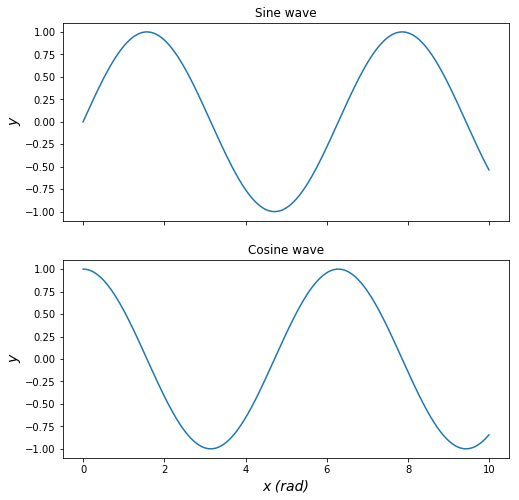

In [0]:
# creates a figure and a set of subplots (ax1 and ax2)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8, 8))
# plot sine wave in the first subplot
ax1.plot(x, y_sin)
ax1.set_title('Sine wave')
ax1.set_ylabel('y', fontsize=14, style='italic')
# plot cosine wave in the second subplot
ax2.plot(x, y_cos)
ax2.set_title('Cosine wave')
ax2.set_ylabel('y', fontsize=14, style='italic')
# this axis is shared by two subplots
ax2.set_xlabel('x (rad)', fontsize=14, style='italic')

## Forms

You can use forms to parameterize your code. To add a form, use *Insert --> Add form field*.  Everytime you change the value in a form, the corresponding value in the code cell will adjust accordingly. Press SHIFT+ENTER or "PLAY" button on the left side to run the cell. In the example below we can adjust $a$ and $b$ parameters for $a sin(bx)$ function, level of noise and a figure size:

In [0]:
#@title Function asin(bx) parameters and figure size
a = 1 #@param {type:"slider", min:0.5, max:5, step:0.1}
b = 1.9 #@param {type:"slider", min:0.5, max:5, step:0.1}
noise = 0.1 #@param {type:"slider", min:0, max:1, step:0.1}
fig_size = 8 #@param {type:"slider", min:4, max:10, step:1}

x = np.arange(-10, 10, 0.01)
y_sin = a*np.sin(b*x) + noise*np.random.normal(size=x.shape)
plt.figure(figsize=(fig_size, fig_size))
plt.plot(x, y_sin)
plt.xlabel('x', fontsize=14, style='italic')
plt.ylabel('y', fontsize=14, style='italic')
plt.title('Sine wave')
plt.show()

## Shell commands

You can invoke shell commands by using either  `%%shell`  or  `%%bash` ["cell magics"](https://ipython.readthedocs.io/en/stable/interactive/magics.html#cell-magics) or by prefixing the command with `!`. For example, the following command will list files and directories in the current directory:

In [0]:
!ls

sample_data


Let's create an empty directory. We first confirm that a directotry with such name doesn't already exist. Since this will result in multiple lines of code, we use `%%bash` command at the beginning of the cell, which indicates that all the code lines in this cell should be interpreted as shell commands.

In [0]:
%%bash
if [ ! -d "ColabIntro" ]; then
  mkdir "ColabIntro"
fi

View again files and directories in the current folder. You should now be able to see a new folder that we've just created.

In [0]:
!ls

ColabIntro  sample_data


We can view a content of our new directory, which should be empty:

In [0]:
!ls ColabIntro

Let's create a text file inside our new directory. We will place a "Hello World" greeting on the first line of this text file:

In [0]:
!echo "Hello World" > ColabIntro/test.txt 

View content of our new folder. We should be able to see the text file we just created.

In [0]:
!ls ColabIntro

test.txt


We can read a text file with `cat` command

In [0]:
!cat ColabIntro/test.txt

Hello World


We can also move or copy files between directories directly from a notebook. In the example below we copy the created text file to our root folder:

In [0]:
!cp ColabIntro/test.txt ./
!ls

ColabIntro  sample_data  test.txt


We can also write individual Python files to "disk" directly from a notebook. For example, it is common to store utility ("helper") functions defined in your notebook for some data analysis procedures in a separate python module (called e.g. utils.py) and then import them into the notebook. We can write a file to disk (virtual storage or GDrive) either with standard shell commands or with a notebook "magic" command (preferred). Let's first do it with a standard shell command:

In [0]:
%%bash
echo """# -*- coding: utf-8 -*-
'''util functions'''

##### Import necessary modules #####

def util1():
    '''Brief description'''
    
    ##### Function body #####
    
    return""" > utils1.py

View the Python file we just created:

In [0]:
!cat utils1.py

# -*- coding: utf-8 -*-
'''util functions'''

##### Import necessary modules #####

def util1():
    '''Brief description'''
    
    ##### Function body #####
    
    return


Append to the already existing python file (e.g. add another utility function):

In [0]:
%%bash
echo """
def util2():
    '''Brief description'''
    
    ##### Function body #####
    
    return""" >> utils1.py

View our Python file again:

In [0]:
!cat utils1.py

# -*- coding: utf-8 -*-
'''util functions'''

##### Import necessary modules #####

def util1():
    '''Brief description'''
    
    ##### Function body #####
    
    return

def util2():
    '''Brief description'''
    
    ##### Function body #####
    
    return


However it is much easier to write and edit+overwrite individual files with `%%writefile` "magic" command:

In [0]:
%%writefile utils2.py
# -*- coding: utf-8 -*-
"""util functions"""

##### Import necessary modules #####

def util1():
    """Brief description"""
    
    ##### Function body #####
    
    return

def util2():
    """Brief description"""
    
    ##### Function body #####
    
    return

Writing utils2.py


View file content:

In [0]:
!cat utils2.py

# -*- coding: utf-8 -*-
"""util functions"""

##### Import necessary modules #####

def util1():
    """Brief description"""
    
    ##### Function body #####
    
    return

def util2():
    """Brief description"""
    
    ##### Function body #####
    
    return

Finally to download a file from a google drive, you can use a gdown command followed by a *download* link. The difference between shared link and download link is that you need to replace 'open' with 'uc'. For example, this won't work:

In [0]:
!gdown https://drive.google.com/open?id=1nJZ9OmrbHVLZIRlCylb5cYrOxnqBLCYq

/usr/local/lib/python2.7/dist-packages/gdown/parse_url.py:31: UserWarning: You specified Google Drive Link but it is not the correct link to download the file. Maybe you should try: https://drive.google.com/uc?id=1nJZ9OmrbHVLZIRlCylb5cYrOxnqBLCYq
  .format(url='https://drive.google.com/uc?id={}'.format(file_id))
Downloading...
From: https://drive.google.com/open?id=1nJZ9OmrbHVLZIRlCylb5cYrOxnqBLCYq
To: /content/open?id=1nJZ9OmrbHVLZIRlCylb5cYrOxnqBLCYq
122kB [00:00, 1.08MB/s]


But once you change 'open' to 'uc' it starts working:

In [0]:
!gdown https://drive.google.com/uc?id=1nJZ9OmrbHVLZIRlCylb5cYrOxnqBLCYq

Downloading...
From: https://drive.google.com/uc?id=1nJZ9OmrbHVLZIRlCylb5cYrOxnqBLCYq
To: /content/atom2.npy
100% 13.6k/13.6k [00:00<00:00, 12.3MB/s]


Now let's remove the directory and file(s) we created:

In [0]:
!rm -r ColabIntro test.txt *.py, *.npy open?*
!ls

sample_data


Notice that usually for one-line shell commands it is more practical to use a "scratch cell" (*Insert* --> *Scratch code cell*): <br><br>

![ScratchCell](https://drive.google.com/uc?export=view&id=1akLBq93g6zHLcWH3oc8SB3DJPlb5dZ-m)

## Simple PyTorch operations

 Let's now do some basic math operations with [PyTorch](https://pytorch.org/). PyTorch is a computational framework for building deep machine learning models. Here, however, we will use PyTorch for some high-school math first and then for a simple regression task.
 
 Import PyTorch:

In [0]:
import torch

Define some tensors:

In [0]:
# Create 3-by-3 tensor containing random numbers
a = torch.rand(3, 3)
# Create 3-by-3 tensor containing all ones
b = torch.ones(3, 3)
# Create identity 3-by-3 tensor
c = torch.eye(3, 3)

View the tensors we just defined:

In [0]:
print(a, type(a))
print(b, type(b))
print(c, type(c))

tensor([[0.9112, 0.9631, 0.7654],
        [0.4443, 0.9876, 0.7720],
        [0.3951, 0.3340, 0.7079]]) <class 'torch.Tensor'>
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) <class 'torch.Tensor'>
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]) <class 'torch.Tensor'>


Subtract/add:

In [0]:
d = torch.sub(b, a)
e = torch.add(b, c)

View results:

In [0]:
print(d, type(d))
print(e, type(e))

tensor([[0.0888, 0.0369, 0.2346],
        [0.5557, 0.0124, 0.2280],
        [0.6049, 0.6660, 0.2921]]) <class 'torch.Tensor'>
tensor([[2., 1., 1.],
        [1., 2., 1.],
        [1., 1., 2.]]) <class 'torch.Tensor'>


It easy to convert between torch tensor class and "standard" python numpy array:

In [0]:
e = e.numpy() # torch tensor --> numpy
print(e, type(e))
e = torch.from_numpy(e) # numpy --> torch tensor
print(e, type(e))

[[2. 1. 1.]
 [1. 2. 1.]
 [1. 1. 2.]] <class 'numpy.ndarray'>
tensor([[2., 1., 1.],
        [1., 2., 1.],
        [1., 1., 2.]]) <class 'torch.Tensor'>


We can also concatenate tensors along the specified axis, e.g. here we concatenate two 2d tensors along their rows (dimension 0)

In [0]:
bc = torch.cat((b, c), dim=0)
print(bc, bc.size())

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]) torch.Size([6, 3])


Concatenation along columns (dimension 1). Also notice that by running the cell below we will override the `bc` variable defined in the cell above.

In [0]:
bc = torch.cat((b, c), dim=1)
print(bc, bc.size())

tensor([[1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 1., 0.],
        [1., 1., 1., 0., 0., 1.]]) torch.Size([3, 6])


One of the main advantages of using pytorch tensors is that you can transfer them to GPU device for faster computations involving tensor operations (which you cannot do for a regular numpy array). We can view a number of available GPU device by running a cell below (you can turn off/on a GPU support in *Runtime --> Change runtime type*).

In [0]:
torch.cuda.device_count()

1

We can also get a [name of GPU](https://en.wikipedia.org/wiki/Nvidia_Tesla) that is available:

In [0]:
torch.cuda.get_device_name(0)

'Tesla T4'

 Here we transfer our concatenated tensor to a GPU device:

In [0]:
bc = bc.cuda()
print(bc)

tensor([[1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 1., 0.],
        [1., 1., 1., 0., 0., 1.]], device='cuda:0')


Confirm that the tensor is "sitting" on GPU device:

In [0]:
bc.is_cuda

True

Now transfer it back to cpu:

In [0]:
bc = bc.cpu()
print(bc)

tensor([[1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 1., 0.],
        [1., 1., 1., 0., 0., 1.]])


Confirm that it is no longer on GPU device:

In [0]:
bc.is_cuda

False

We will be using this simple operation to transfer a neural network model and training data between between CPU and GPU in the next section.

**Small caveat:** Our numpy arrays are 64 bit floating point number by default, which is cast to DoubleTensor when `torch.from_numpy()` is called. When training our model, however, our weights will be FloatTensor (32 bit floating point) by default. This mismatch will cause an error. The easiest solution is to cast a DoubleTensor to FloatTensor by simply calling `.float()`, i.e. `atomic_lattice_noisy = torch.from_numpy(atomic_lattice_noisy).float()`.

## Simple regression analysis with PyTorch

Neural networks are [universal function approximator](https://en.wikipedia.org/wiki/Universal_approximation_theorem). Here as an example we will generate data points using a *sin* function, corrupt the produced data by random noise and then will "fit" the target distribution with a neural network. The data will be generated with PyTorch instead of numpy module (but notice many similarities):

In [0]:
torch.manual_seed(42)
x = torch.unsqueeze(torch.arange(-10, 10, 0.01), dim=1)
y = torch.sin(x) + 0.2*torch.rand(x.size())

Plot the generated data:

Text(0, 0.5, 'y')

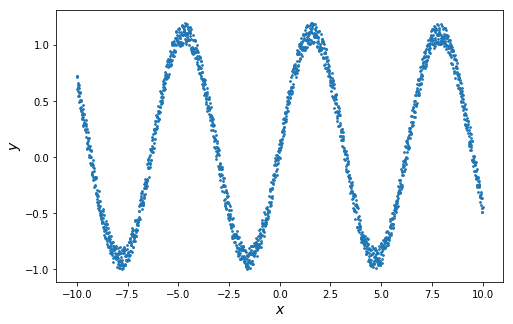

In [0]:
_, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.scatter(x, y, s=3)
ax.set_xlabel('x', fontsize=14, style='italic')
ax.set_ylabel('y', fontsize=14, style='italic')

We now constuct a simple neural network to fit the data without any prior knowledge by the neural network about what function was used to produce the data. Our neural network has just two [standard "linear layers"](https://en.wikipedia.org/wiki/Multilayer_perceptron), each with 100 neurons, activated by leaky rectified linear unit function. We then specify parameters for model training (weights optimizer and loss function/criterion) and move it to GPU device for faster computations.

In [0]:
# Construct model
model = torch.nn.Sequential(
        torch.nn.Linear(in_features=1, out_features=100),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(in_features=100, out_features=100),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(in_features=100, out_features=1),
    )
# Move our model together with the training data to GPU device
model.cuda()
x = x.cuda()
y = y.cuda()
# Specify optimizer and loss function for neural network training
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9) #stochastic gradient descent
criterion = torch.nn.MSELoss() #mean-squared loss

Finally, we train our simple model:

(this shouldn't take more than one minute)

In [0]:
EPOCHS = 30000
for e in range(EPOCHS):
    # clear gradients
    optimizer.zero_grad()
    # propagate variable x through a network and get prediction for y value
    y_predicted = model(x)
    # compare predicted value with true value and calculate mean squared error
    loss = criterion(y_predicted, y)
    # do backpropagation to compute gradients
    loss.backward()
    # optimize weights
    optimizer.step() 
    # print statistics
    if e % 100 == 0:
        print('Epoch: {}  Loss: {}'.format(e, loss.item()))

Epoch: 0  Loss: 0.7883844375610352
Epoch: 100  Loss: 0.4273644685745239
Epoch: 200  Loss: 0.3982737958431244
Epoch: 300  Loss: 0.36736512184143066
Epoch: 400  Loss: 0.33280667662620544
Epoch: 500  Loss: 0.29656609892845154
Epoch: 600  Loss: 0.26173102855682373
Epoch: 700  Loss: 0.23373232781887054
Epoch: 800  Loss: 0.21331393718719482
Epoch: 900  Loss: 0.19973015785217285
Epoch: 1000  Loss: 0.19046270847320557
Epoch: 1100  Loss: 0.18369483947753906
Epoch: 1200  Loss: 0.17945164442062378
Epoch: 1300  Loss: 0.17562800645828247
Epoch: 1400  Loss: 0.17261172831058502
Epoch: 1500  Loss: 0.16973888874053955
Epoch: 1600  Loss: 0.16687609255313873
Epoch: 1700  Loss: 0.16384558379650116
Epoch: 1800  Loss: 0.16068238019943237
Epoch: 1900  Loss: 0.15743915736675262
Epoch: 2000  Loss: 0.15408362448215485
Epoch: 2100  Loss: 0.15060395002365112
Epoch: 2200  Loss: 0.14698362350463867
Epoch: 2300  Loss: 0.143209308385849
Epoch: 2400  Loss: 0.13927631080150604
Epoch: 2500  Loss: 0.13518348336219788
Epo

Transfer data back to CPU and convert it to numpy for plotting:

In [0]:
x_to_plot = x.cpu().numpy()
y_to_plot = y.cpu().numpy()
y_predicted_to_plot = y_predicted.cpu().data.numpy()

Plot results:

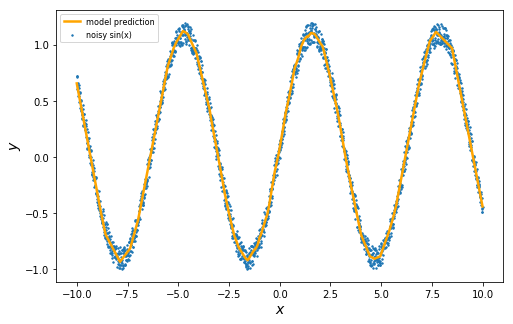

In [0]:
_, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.scatter(x_to_plot, y_to_plot, s=2, label='noisy sin(x)')
ax.plot(x_to_plot, y_predicted_to_plot, c='orange', linewidth=2.5, label='model prediction')
ax.set_xlabel('x', fontsize=14, style='italic')
ax.set_ylabel('y', fontsize=14, style='italic')
ax.legend(loc='best', fontsize=8)

The result are actually pretty good. Notice that this type of neural network generally cannot capture long-range patterns in the data and is also not very good at generalization, which is why in the future we are going to use a network consisting of convolutional layers instead of classical "linear" layers as we did here.